In [37]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
import cv2
from sklearn.model_selection import train_test_split
import keras.utils as utils

# MNIST 기초
- inverse를 통한 mnist 학습 (방정식 풀기)
- 신경망을 통한 mnist 합습
- CNN통한 mnist 학습
- fashion mnist, face db 테스트
- web 연동(한글, 스케치 인식)

(60000, 28, 28)


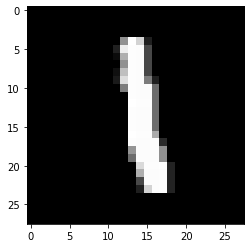

In [56]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# train = 6만장 / test 1만장
# label은 0 ~ 9 까지
# 28 x 28의 픽셀

print(X_train.shape)
plt.imshow(X_train[6], cmap = 'gray')

(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  22 192 134  32   0   0   0   0   0
    0   0   0  15  77   5   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17 235 250 169   0   0   0   0   0   0
    0   0  15 220 241  37   0   0   0   0]
 [  0   0   0   0   0   0   0  20 189 253 147   0   0   0   0   0   0   0
    0   0 139 253 100   0   0   0   0   0]
 [  0   0   0   0   0   0   0  70 253 253  21   

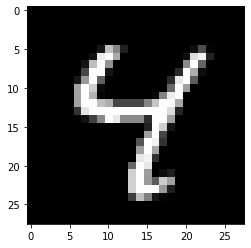

In [58]:
print(X_test.shape)
plt.imshow(X_test[6], cmap = 'gray')

print(X_test[6])
print(y_train.shape)
# print(y_train)
# print(y_test)

# inverse로 풀기 -> 1D 로 바꿔야함

In [34]:
# 28 X 28 = 784

X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# 원핫인코딩

In [35]:
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

## 1. 역행렬(inverse)을 이용한 학습

- y = wx + b
- A 행렬 만들기 -> 60000 x 785 크기의 행렬
- W = inv(A) * Y   ->   Y 는 60000 x 10(원핫인코딩) ,  W = 785 x 10 
- predict   [x 1] * W , where

In [36]:
# bias 텁을 뒤에다가 쭉 붙이는 거 (1 붙이기)

A = np.hstack((X_train, np.ones((60000,1)) ))

print(A.shape)

(60000, 785)


In [37]:
%%time
W = np.matmul(lin.pinv(A), y_train_e)
print(W.shape)
print(W)

(785, 10)
[[ 7.44778176e-17  3.08116485e-17  6.24517735e-17 ... -1.88247216e-17
  -9.68761668e-17  2.74183832e-17]
 [-2.02652642e-15 -8.88043361e-15 -1.23469953e-14 ...  9.01778765e-15
   1.44453949e-14  4.97795720e-15]
 [ 3.89572462e-15  8.31633536e-15  8.79628286e-15 ... -6.90318037e-15
  -1.11422250e-14 -2.33884532e-15]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.57799659e-01  2.41326501e-01  4.98284745e-02 ...  1.41540555e-01
  -1.23002061e-01  4.55121243e-02]]
Wall time: 5.59 s


In [38]:
# W는 b를 포함한 것.
print(W.shape)
print(W[:,0].shape)

(785, 10)
(785,)


[[ 2.70655230e-02  5.57313119e-03  1.03302659e-01 ...  9.07462532e-01
  -8.18155262e-02  8.16857901e-02]
 [ 2.21591438e-01 -2.28150941e-01  8.29815036e-01 ... -2.76097536e-02
  -3.19366512e-02 -8.76217553e-02]
 [ 4.16229954e-02  7.48610962e-01  4.39850924e-02 ...  5.70045212e-02
  -6.22603850e-02  1.88827340e-02]
 ...
 [-2.44776825e-01 -3.88461482e-02 -4.20549102e-03 ...  1.73839006e-01
   1.63249824e-01  2.78782658e-01]
 [-6.16243161e-02  1.62818828e-02 -6.72047788e-02 ... -8.93262296e-04
   4.44767743e-01 -2.03233025e-01]
 [ 7.01823348e-02 -1.36509207e-01  5.87715572e-02 ...  2.21727977e-02
  -1.22611134e-01 -4.09390153e-02]]
(10000, 10)
[7 2 1 ... 4 5 6]
(10000,)
0.8603


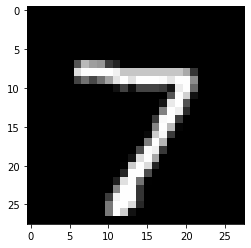

In [44]:
T = np.hstack((X_test, np.ones((10000,1)) ))
p_ = np.matmul(T, W)

print(p_)
print(p_.shape)

y_ = np.argmax(p_, axis = 1)   # 확률값으로 리턴 나옴

print(y_)
print(y_.shape)

plt.imshow(X_test[0,:].reshape(28, 28), cmap = 'gray')


# 성능 평가 = 86% : linear로 풀어도 어느정도 성능이 나온다.
print(np.mean( y_ == y_test ) )

In [17]:
a = np.array([[1,2,3], 
              [7,8,9], 
              [4,10,6]])

np.argmax(a)
np.argmax(a, axis = 1) # 각각의 행에서 최댓값을 리턴

array([2, 2, 1], dtype=int64)

# 예측 값 확인해보기

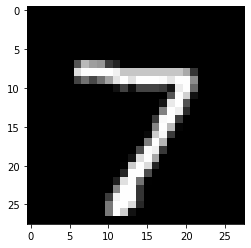

In [19]:
plt.imshow(X_test[0,:].reshape(28, 28), cmap = 'gray')

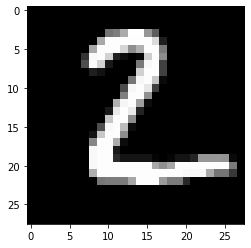

In [20]:
plt.imshow(X_test[1,:].reshape(28, 28), cmap = 'gray')

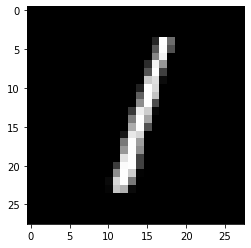

In [21]:
plt.imshow(X_test[2,:].reshape(28, 28), cmap = 'gray')

# 소프트맥스 -> 작은건 더 작게 / 큰건 더 크게 하자는 뜻 => exp 함수 적용

In [45]:
model = Sequential()
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

# 학습 시키기

In [ ]:
# y는 원핫 인코딩 된 것을 주기
# epochs - 전체 데이터 다 사용 10번 사용
# 32개씩 데이터를 랜덤하게 뽑아서 학습시키겠다.  -> 32개씩 뽑아서 하고 웨이트 반영하고 ,,, 
# 전체 데이터 60000개 

hist = model.fit(x = X_train, y = y_train_e, 
                epochs =10,
                verbose = 1,
                batch_size = 100)

In [48]:
score = model.evaluate(X_test, y_test_e, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.9329237937927246
Test accuracy: 0.9034000039100647


In [51]:
p1 = model.predict(X_test)
print(p1.shape)

p1 = np.argmax(p1, axis = 1)  # 인덱스 값 뽑아내는 함수 argmax
 
print(np.mean(p1 == y_test))

(10000, 10)
0.9034


In [52]:
p2 = model.predict(X_train)
print(p2.shape)

p2 = np.argmax(p2, axis = 1)  # 인덱스 값 뽑아내는 함수 argmax
 
print(np.mean(p2 == y_train))

(60000, 10)
0.9134666666666666


In [55]:
# 784 차원 + 1 : 분류기당 785개 * 10개 분류기 = 7850개
print(784 * 10 + 10)   /  input size * 뉴런수 + 뉴런수

7850


# 각 레이어에서 추정해야하는 파라미터 갯수
- layer 추가 + 정규화 필수

In [71]:
model = Sequential()

# 784 차원을 5 차원으로 너무 확 줄임 -> 성능이 잘 안나옴
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))    # 마지막 나오는 아웃풋은 10개이므로 바꿀 수 없음.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

# 784 차원 * 5 + 5  = 3925 개,, / layer1에 대한것
print(784 * 5 + 5)

# 두번째 노드 층 
# 입력 갯수 = 5 / 뉴런수 = 10 
print(5 * 10 + 10)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
3925
60


In [72]:
hist = model.fit(x = X_train, y = y_train_e, 
                epochs =50,
                verbose = 1,
                batch_size = 100)


Epoch 1/50
600/600 [==============================] - 1s 2ms/step - loss: 2.4229 - accuracy: 0.8858
Epoch 2/50
600/600 [==============================] - 1s 2ms/step - loss: 0.4023 - accuracy: 0.9411
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 0.2276 - accuracy: 0.9582
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 0.1688 - accuracy: 0.9651
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 0.1479 - accuracy: 0.9681
Epoch 6/50
600/600 [==============================] - 1s 2ms/step - loss: 0.1307 - accuracy: 0.9697
Epoch 7/50
600/600 [==============================] - 1s 2ms/step - loss: 0.1021 - accuracy: 0.9750
Epoch 8/50
600/600 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.9748
Epoch 9/50
600/600 [==============================] - 1s 2ms/step - loss: 0.1042 - accuracy: 0.9754
Epoch 10/50
600/600 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9785

In [73]:
score = model.evaluate(X_test, y_test_e, verbose = 0)
print('Test accuracy:', score[1])

Test accuracy: 0.9735999703407288


## 정규화
- 영상은 무조건 정규화 해줄것(/255)

In [75]:
# 1차원으로 만들기 전의 2차원 함수

X_train = X_train / 255
X_test = X_test / 255

In [76]:
hist = model.fit(x = X_train, y = y_train_e, 
                epochs =50,
                verbose = 1,
                batch_size = 100)

Epoch 1/50
600/600 [==============================] - 1s 2ms/step - loss: 0.1310 - accuracy: 0.9559
Epoch 2/50
600/600 [==============================] - 1s 2ms/step - loss: 0.0129 - accuracy: 0.9970
Epoch 3/50
600/600 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9988
Epoch 4/50
600/600 [==============================] - 1s 2ms/step - loss: 0.0043 - accuracy: 0.9993
Epoch 5/50
600/600 [==============================] - 1s 2ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 6/50
600/600 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9996
Epoch 7/50
600/600 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 8/50
600/600 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 9/50
600/600 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 10/50
600/600 [==============================] - 1s 2ms/step - loss: 0.0064 - accuracy: 0.9980

In [78]:
# 정규화로 2% 성능 향상됨

score = model.evaluate(X_test, y_test_e, verbose = 0)
print('Test accuracy:', score[1])

Test accuracy: 0.9833999872207642


## CNN

### CNN 하기 위한 기본 준비

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 60000 x 28 x 28 x 1
X_train = X_train.reshape((60000,28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train_e.shape)
# 무조건 정규화는 한다고 생각한다.
X_train = X_train / 255
X_test = X_test / 255

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)


In [29]:
model = Sequential()

model.add(Conv2D(input_shape = (28, 28, 1), filters = 50, 
                kernel_size = (3,3), strides = (1,1), padding = 'same'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D( filters = 50, 
                kernel_size = (3,3), strides = (1,1), padding = 'same'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# 2차원 벡터 1차원으로 바꾸기
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy',
             optimizer = adam, metrics = ['accuracy'])

In [30]:
model.summary()

# input -> 60000 x 28 x 28 x 1
# layer conv -> ? x 28 x 28 x 50    ->   파라미터 : 학습해야하는 가중치  500 = 3 * 3  * 1 * 50 + 50 (3 x 3 필터 50개 학습 + bias 50개)
# layer dense(256)    ->    9800 * 256 + 256
# layer conc2 ->            13530 = 9 * 30 * 50(입력으로 들어오는 채널수) + 30 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0

In [31]:
history = model.fit(X_train, y_train_e,
                   batch_size = 50,
#                    validation split = 0.2   # validation split = 0.2 -> 80%는 훈련으로 하겠다.
                   epochs = 1, verbose = 1)

1200/1200 [==============================] - 48s 40ms/step - loss: 0.1319 - accuracy: 0.9592


In [93]:
score = model.evaluate(X_test, y_test_e, verbose = 0)
print('Test accuray:', score[1])

Test accuract: 0.9836999773979187


In [32]:
history = model.fit(X_train, y_train_e,
                   batch_size = 100,
                   epochs = 1, verbose = 0)  

score = model.evaluate(X_test, y_test_e, verbose =1)
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0350 - accuracy: 0.9886
Test accuracy: 0.9886000156402588


In [107]:
model.save('mnist_cnn.h5')

In [110]:
model = Sequential()

model.add(Conv2D(input_shape = (28, 28, 1), filters = 50, 
                kernel_size = (3,3), strides = (1,1), padding = 'same'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D( filters = 50, 
                kernel_size = (3,3), strides = (1,1), padding = 'same'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D( filters = 30, 
                kernel_size = (3,3), strides = (1,1), padding = 'same'))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))



# 2차원 벡터 1차원으로 바꾸기
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy',
             optimizer = adam, metrics = ['accuracy'])

In [111]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
activation_17 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_18 (Activation)   (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 30)        

In [112]:
history = model.fit(X_train, y_train_e,
                   batch_size = 100, epochs = 1, verbose = 1)  

600/600 [==============================] - 47s 78ms/step - loss: 0.2479 - accuracy: 0.9248


In [113]:
score = model.evaluate(X_test, y_test_e, verbose = 0)
print('Test accuracy:', score[1])

Test accuracy: 0.9761999845504761


In [114]:
model.save('mnist_cnn_tiny.h5')  # 저장용량 작아짐

# 실제 테스트 해보기

In [33]:
from keras.models import load_model
model = load_model('mnist_cnn_tiny.h5')
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
activation_17 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_18 (Activation)   (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 30)        

[[1.9659194e-10 1.9096194e-09 9.0947978e-09 2.4032099e-07 1.7071637e-10
  9.9998546e-01 9.7898095e-08 1.0203701e-07 4.9178652e-07 1.3545751e-05]]
5


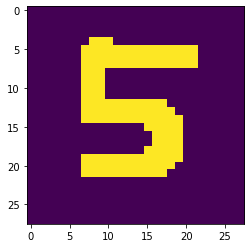

In [36]:
import cv2

img = cv2.imread('05.png', 0) / 255
plt.imshow(img)

# 4차원으로 만들기 / test data
img = img.reshape(1,28,28,1)

p = model.predict(img)
print(p)

print(np.argmax(p))

plt.plot(p)

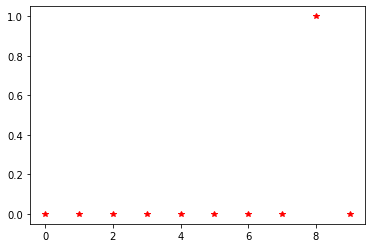

In [26]:
plt.plot(p[0], 'r*')

# MNIST Web 구현
- 숫자인식 / 한글인식

In [42]:
%%writefile server.py

import flask
from flask import Flask, render_template, url_for, request
import base64
import numpy as np
import cv2
from keras.models import load_model
import io 

import tensorflow as tf
from keras import backend as K
 

init_Base64 = 21       # data:image/png;base64로 시작
app = Flask(__name__)



@app.route('/')
def home():
    return render_template("mnist.html", ctx = {})


@app.route('/upload', methods=['POST'])
def upload():
    
    model = load_model('mnist_cnn_tiny.h5')
    modelH = load_model('hand_written_korean_classification.hdf5')
    labels_file = io.open('label.txt', 'r', encoding = 'utf-8').read().splitlines()
    label = [str for str in labels_file]

    draw = request.form['url']
    draw = draw[init_Base64:]
    draw_decoded = base64.b64decode(draw)
    image = np.asarray(bytearray(draw_decoded), dtype = "uint8")
    
    mode = request.form.get("mode", "digit")
    
    if mode == 'digit' :
        
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, dsize=(28, 28), interpolation=cv2.INTER_AREA)
        image = image.reshape(1,28,28,1)


        p = model.predict(image)
        p = np.argmax(p)
    
    else: 
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.resize(image, dsize=(32, 32), interpolation=cv2.INTER_AREA)
        image = (255 - image) / 255
        image = image.reshape(1,32,32,3)
        

        p = modelH.predict(image)
        p = label[np.argmax(p)]

    return f"result : {p} <a href=javascript:history.back()>뒤로</a>"

if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True, port = 8000)

Overwriting server.py


# 한글 인식

In [15]:
from keras.models import load_model
import cv2

In [13]:
model = load_model('hand_written_korean_classification.hdf5')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [23]:
import io
labels_file = io.open('label.txt', 'r', encoding = 'utf-8').read().splitlines()
label = [str for str in labels_file]

각


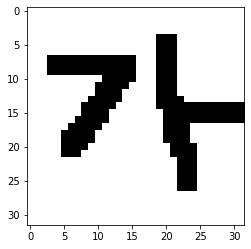

In [26]:
image = cv2.imread('ka.png')
image = (255-image)/255
plt.imshow(image)

image = image.reshape(1, 32, 32, 3)
p = model.predict(image)

# 원하는 값이 있는 라벨 나오게 하는 함수 = argmax
p = np.argmax(p) 
print(label[p])

In [32]:
import tensorflow
tensorflow.__version__

'2.2.0'